# **Seaborn**

## **1. Seaborn 기본 사용법**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

- Sine 함수 그려보기

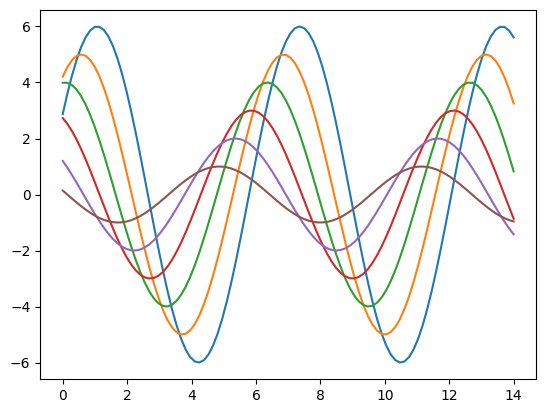

In [2]:
np.random.seed(987654321)
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sin = sinplot()
plt.savefig("sin.png")

## **2. Seaborn의 장점**

- Joint plots
  -  분산 플롯과 축의 분산 플롯의 각 변수 분포와 쌍을 이루는 그래프
  - R에도 매우 비슷한 플롯이 존재하지만 Seaborn의 Jointplot에서는 한 줄의 코드만 사용한 것에 반해 R에서는 최소한 5 ~ 6 줄을 구현해야 했으며, ggplot2에서 한계 플롯을 파악할 수 없었기 때문에 기본 플로팅 패키지를 사용해야함
  - 이와 같은 그래프는 실제로 우리가 검사하는 데이터에 대해 더욱 많은 것을 보여줄 수 있음

- jpintplot의 가장 간단한 호출
  - 한계 히스토그램 (histplot() 사용)이있는 산점도 () 사용)를 할당하고 생성하기

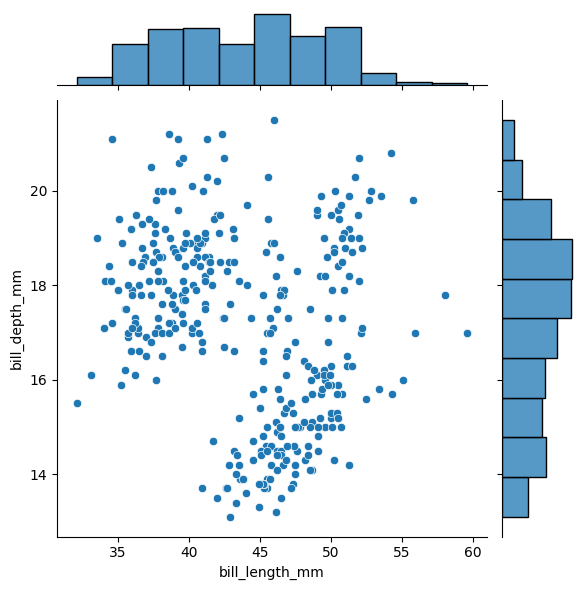

In [3]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

- 변수를 할당하면 
  - 산점도에 조건부 색상이 추가되고 
  - 한계 축에 별도의 밀도 곡선(kdeplot() 사용)이 그려짐
- 이 그래프는
  - 산점도 대신 커널 밀도 플롯을 사용
  - 분포는 히스토그램 대신 부드럽게 표현할 수 있도록 계산됨
  - 밀도와 상관 관계 및 데이터 분포에 특히 관심이 있는 경우 유용한 그래프
  - 이는 기존의 통계 필드뿐만 아니라 다양한 공간 분석 응용 분야에서 매우 유용함

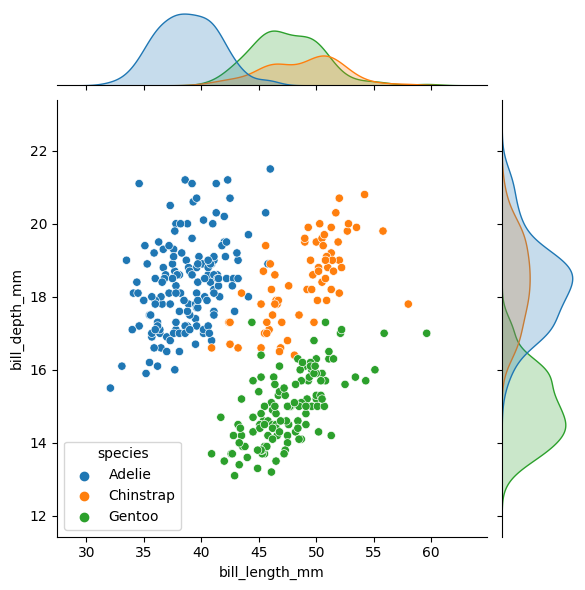

In [4]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

- 플로팅에 대한 몇 가지 다른 접근 방식을 매개 변수를 통해 사용하기
  - 설정: 이변량 KDE와 단변량 KDE를 모두 그림
  - kind="kde"

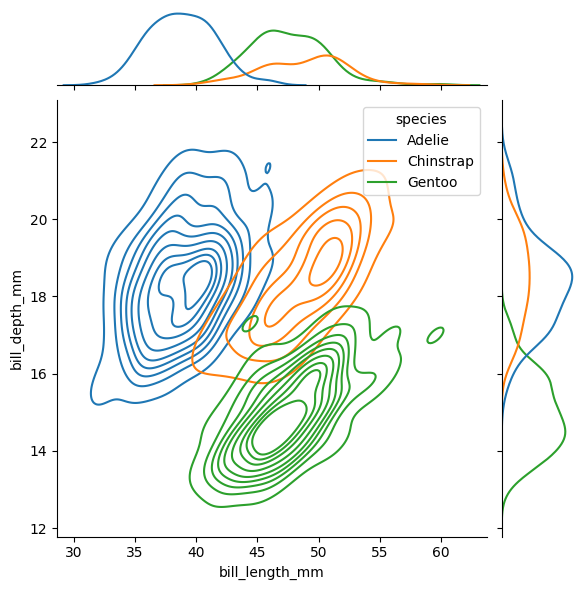

In [5]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

- 선형 회귀 적합(regplot() 사용)과 단변량 KDE 곡선 추가 설정
  - kind="reg"
- 이 그래프는
  - 산점도의 회귀선과 사용된 선형 모형의 적합도 평가가 포함됨
  - 선 주위에 오류 필드를 포함하면 선형 회귀의 정확도를 더 잘 시각화 할 수 있음
  - 데이터 분포는 여백으로 제공
  - 일반적으로 이러한 모든 정보를 전달하기 위해 세 개의 별도 그래프가 필요하지만 Seaborn은 이것을 훨씬 간단하게 만들어 줌
  - 한 줄의 코드로 이 선형 회귀와 관련된 모든 관련 정보를 다루는 그래프를 만들 수 있음


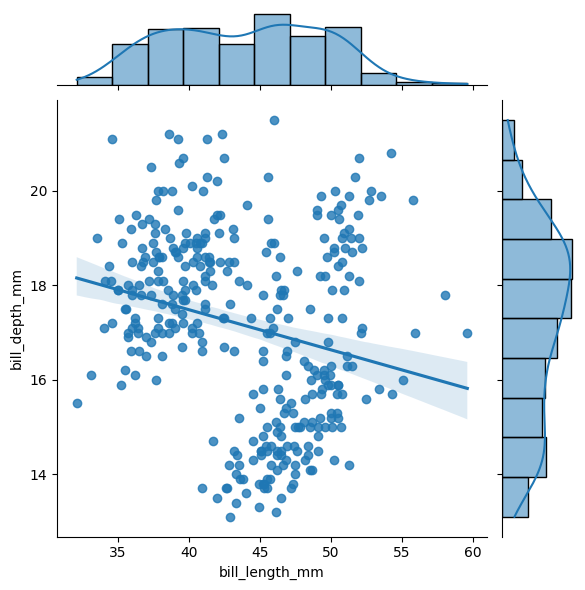

In [6]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="reg")

- 공동 분포의 bin-based 시각화 옵션(1)
  - kind="hist"

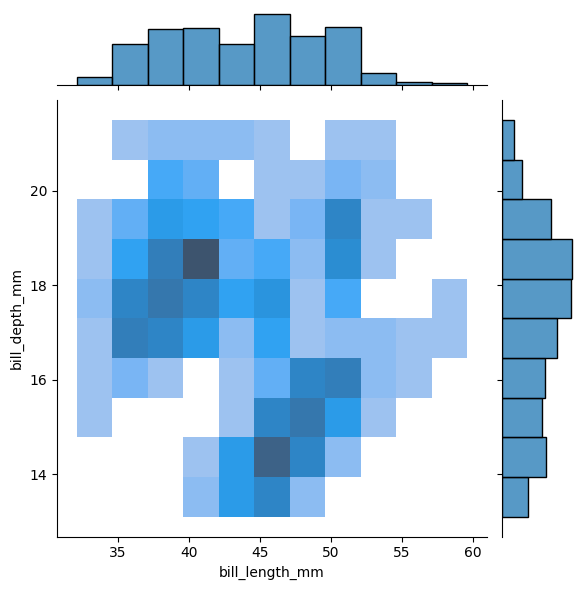

In [7]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="hist")

- 공동 분포의 bin-based 시각화 옵션(2)
  - 설정에서 matplotlib.axes.Axes.hexbin()을 사용하여 육각형 빈을 사용하여 이변량 히스토그램을 계산하기
  - kind="hex"

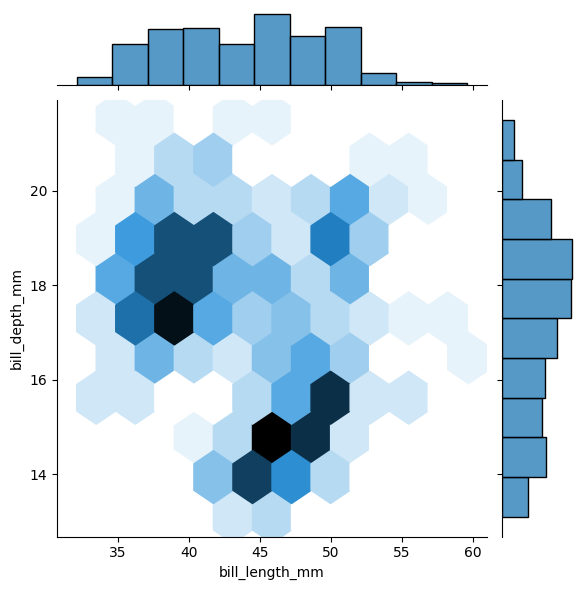

In [8]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="hex")

- 추가 키워드 인수를 기본 플롯으로 전달하기

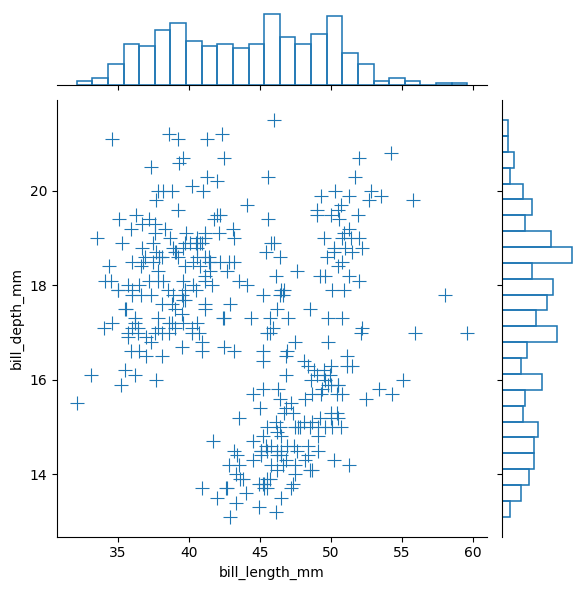

In [9]:
sns.jointplot(
    data=penguins, x="bill_length_mm", y="bill_depth_mm",
    marker="+", s=100, marginal_kws=dict(bins=25, fill=False),
)

- JointGrid 매개 변수를 사용하여 그림의 크기와 레이아웃을 제어

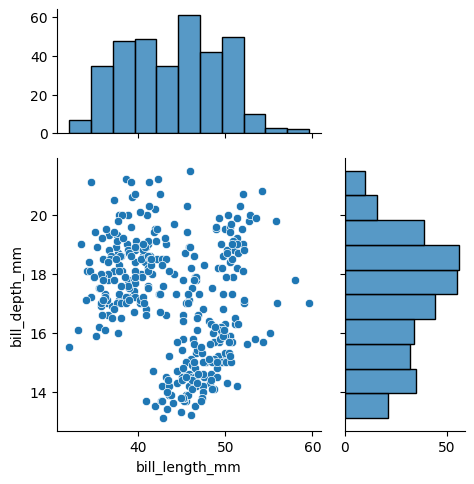

In [10]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", height=5, ratio=2, marginal_ticks=True)

- 플롯에 레이어 추가하기
  - jointplot()이 반환하는 JointGrid 객체의 메서드를 사용

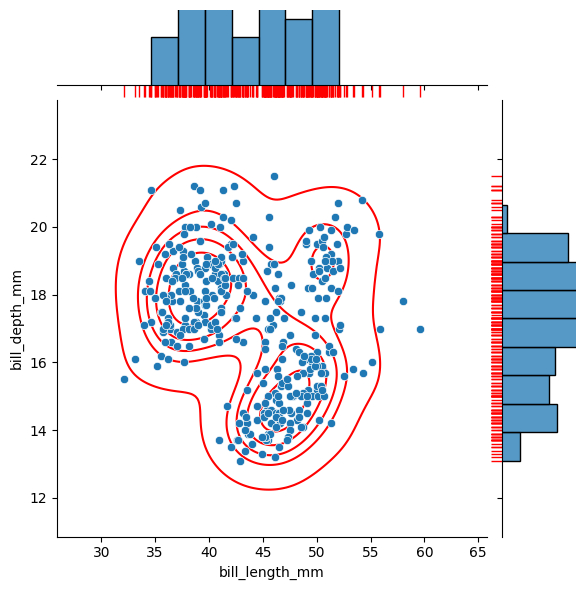

In [11]:
g = sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

- violinplot
  - Seaborn에서 사용할 수 있는 다소 새로운 그래프 유형인 바이올린 플롯
  - 기본적으로 박스 플롯의 통합과 분포의 커널 밀도 추정치를 표현
  - 상자 그림과 일 변량 분포 그래프는 일부 데이터 세트의 분석을 처음 시작할 때 매우 유용함
  -  Seaborn은 다른 분석 도구를 사용하여 일반적으로 여러 그래프를 가져 오는 단일 그래프를 쉽게 생성 할 수 있게함으로써 프로세스의 작업을 편하게 만들어줌

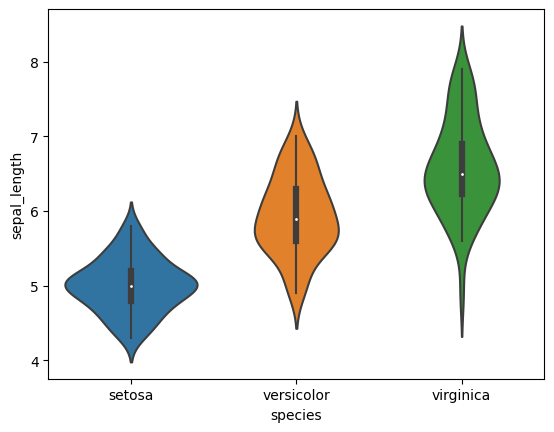

In [12]:
iris = sns.load_dataset("iris")    
sns.violinplot(x=iris.species, y=iris.sepal_length, data=iris);
plt.savefig("violin.png")

- 일 변량 로지스틱 회귀 분석 결과를 그래픽으로 요약하기
  - 총 식사 비용에 대해 팁이 20%보다 크거나 '큰' 경우, 회귀 결과에 이진 지표를 표시함
- 이 그래프는...
  - 사람들이 식사비가 더 비싸면 적어도 비례적으로 팁을주지 않는다는 것을 매우 명확하게 보여줌